# HR Analytics Project

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? 

importing the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier

from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

importing the data set

In [4]:
df=pd.read_csv('hr.csv')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


understanding the data

In [5]:
df.shape

(1470, 35)

In [6]:
df.drop('EmployeeNumber',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

there is no null data and there is both object and numerical datatype observed

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.duplicated().sum()

0

Separating Numerical & Categorical columns

In [10]:
ccol = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",ccol)
print("\n")

ncol = df.select_dtypes(include=['int64']).columns
print("Numerical columns are:",ncol)

Categorical columns are: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


Numerical columns are: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


single feature analysis

In [11]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [12]:
for i in ccol:
    print(df[i].value_counts())
    print('\n')

Attrition
No     1233
Yes     237
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Gender
Male      882
Female    588
Name: count, dtype: int64


JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


Over18
Y    147

bivariant analysis of features 

<Axes: >

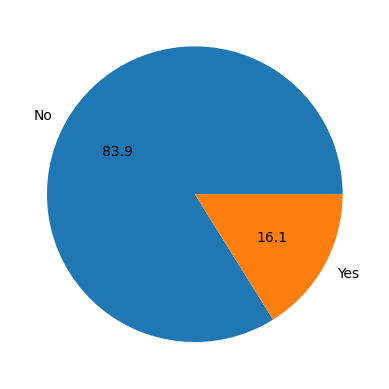

In [13]:
df.groupby('Attrition').size().plot(kind='pie',autopct='%.1f')

<Axes: xlabel='BusinessTravel', ylabel='count'>

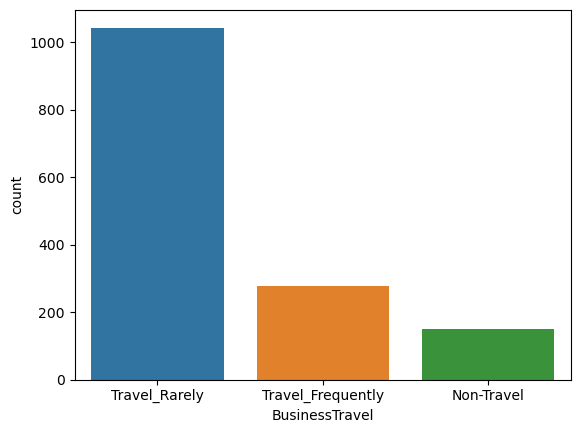

In [14]:
sns.countplot(x='BusinessTravel', data=df)

<Axes: xlabel='JobRole', ylabel='count'>

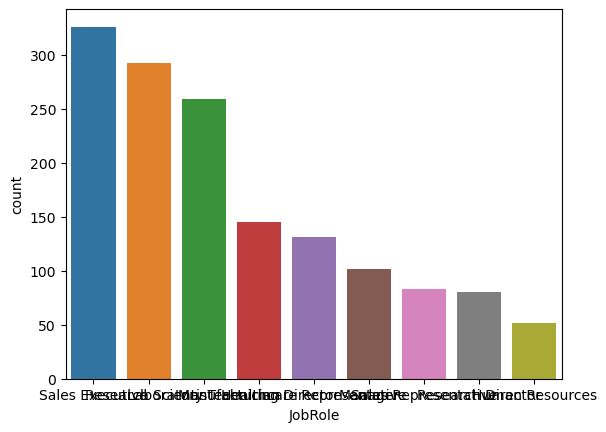

In [15]:
sns.countplot(x='JobRole', data=df)

<Axes: >

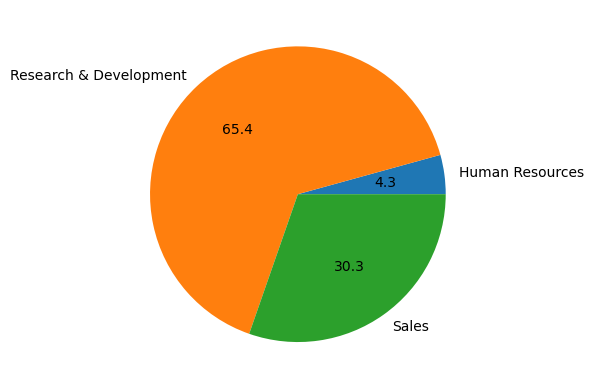

In [16]:
df.groupby('Department').size().plot(kind='pie',autopct='%.1f')

<Axes: >

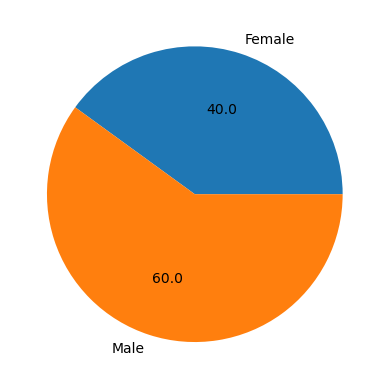

In [17]:
df.groupby('Gender').size().plot(kind='pie',autopct='%.1f')

analysing the distribution of each feature

In [19]:
le=LabelEncoder()
ob= ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for i in ob:
    df[i]=le.fit_transform(df[i].astype(str))   
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,4,...,4,80,0,17,3,2,9,6,0,8


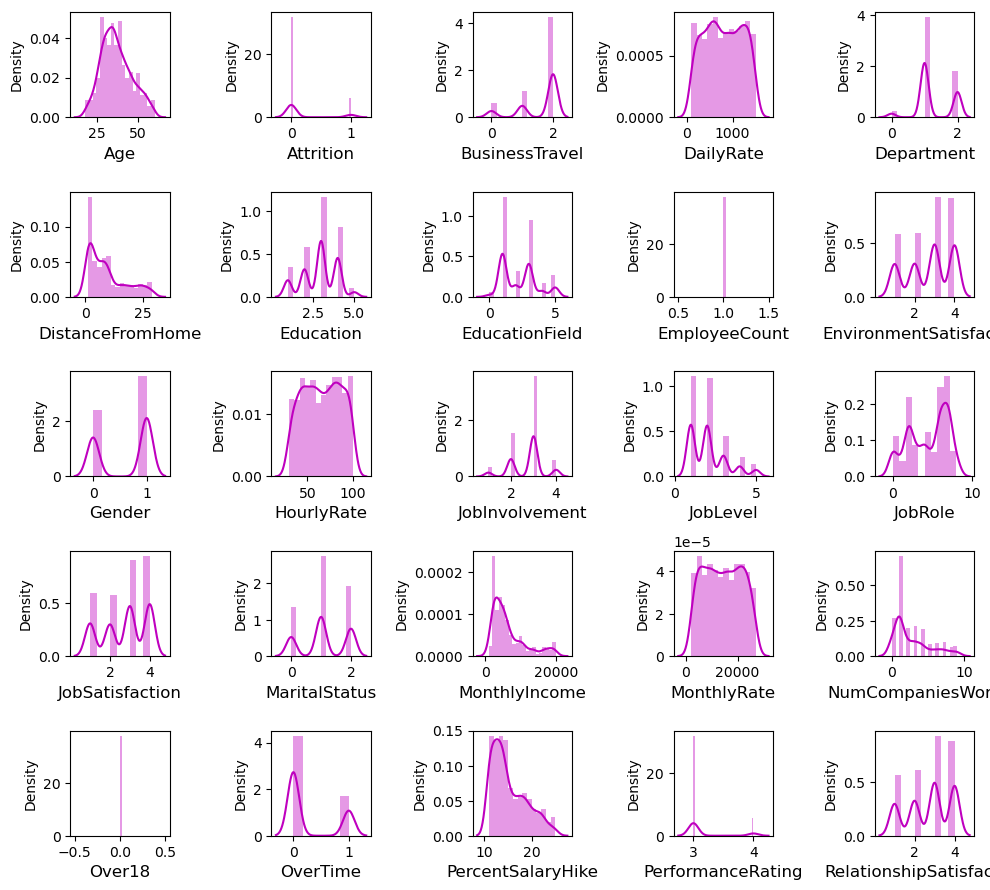

In [20]:
plt.figure(figsize=(10,9),facecolor="white")
pltno=1
for col in df:
    if pltno<=25:
        ax=plt.subplot(5,5,pltno)
        sns.distplot(df[col],color="m",kde=True)
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    pltno+=1
plt.tight_layout()


In [21]:
def corr_columns(df, threshold):
    correlated_columns = set()
    for i, col1 in enumerate(df.columns):
        for j, col2 in enumerate(df.columns[:i]):
            if abs(df[col1].corr(df[col2])) > threshold:
                correlated_columns.add(col1)
    
    return correlated_columns


In [22]:
features = corr_columns(df, 0.5)
len(set(features))
print(features)

{'YearsInCurrentRole', 'YearsWithCurrManager', 'PerformanceRating', 'YearsAtCompany', 'TotalWorkingYears', 'YearsSinceLastPromotion', 'MonthlyIncome', 'StockOptionLevel', 'JobRole', 'JobLevel'}


In [23]:
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [24]:
best_f=SelectKBest(score_func=f_classif,k=17)
fit=best_f.fit(x,y)
df_scr=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(x.columns)

In [25]:
fea_scr=pd.concat([df_col,df_scr],axis=1)
fea_scr.columns=['Feature_name','Score']
print(fea_scr.nlargest(20,'Score'))

                Feature_name      Score
20                  OverTime  94.656457
26         TotalWorkingYears  44.252491
12                  JobLevel  43.215344
15             MaritalStatus  39.599763
30        YearsInCurrentRole  38.838303
16             MonthlyIncome  38.488819
0                        Age  38.175887
32      YearsWithCurrManager  36.712311
25          StockOptionLevel  28.140501
29            YearsAtCompany  27.001624
11            JobInvolvement  25.241985
14           JobSatisfaction  15.890004
8    EnvironmentSatisfaction  15.855209
4           DistanceFromHome   8.968277
13                   JobRole   6.649672
3                 Department   6.035877
28           WorkLifeBalance   6.026116
27     TrainingTimesLastYear   5.211646
2                  DailyRate   4.726640
23  RelationshipSatisfaction   3.095576


In [26]:
new=df[['OverTime','TotalWorkingYears','JobLevel','MaritalStatus','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager','StockOptionLevel','YearsAtCompany','JobInvolvement','JobSatisfaction','EnvironmentSatisfaction','DistanceFromHome','JobRole','Department','WorkLifeBalance']]

In [27]:
new.describe()

,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,WorkLifeBalance
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.282993,11.279592,2.063946,1.097279,4.229252,6502.931293,36.923810,4.123129,0.793878,7.008163,2.729932,2.728571,2.721769,9.192517,4.458503,1.260544,2.761224
std,0.450606,7.780782,1.106940,0.730121,3.623137,4707.956783,9.135373,3.568136,0.852077,6.126525,0.711561,1.102846,1.093082,8.106864,2.461821,0.527792,0.706476
min,0.000000,0.000000,1.000000,0.000000,0.000000,1009.000000,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,6.000000,1.000000,1.000000,2.000000,2911.000000,30.000000,2.000000,0.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,10.000000,2.000000,1.000000,3.000000,4919.000000,36.000000,3.000000,1.000000,5.000000,3.000000,3.000000,3.000000,7.000000,5.000000,1.000000,3.000000
75%,1.000000,15.000000,3.000000,2.000000,7.000000,8379.000000,43.000000,7.000000,1.000000,9.000000,3.000000,4.000000,4.000000,14.000000,7.000000,2.000000,3.000000
max,1.000000,40.000000,5.000000,2.000000,18.000000,19999.000000,60.000000,17.000000,3.000000,40.000000,4.000000,4.000000,4.000000,29.000000,8.000000,2.000000,4.000000


correlation matrrix

In [28]:
new.corr()

,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,WorkLifeBalance
OverTime,1.000000,0.012754,0.000544,-0.017521,-0.029758,0.006089,0.028062,-0.041586,-0.000449,-0.011687,-0.003507,0.024539,0.070132,0.025514,0.040662,0.007481,-0.027092
TotalWorkingYears,0.012754,1.000000,0.782208,-0.077886,0.460365,0.772893,0.680381,0.459188,0.010136,0.628133,-0.005533,-0.020185,-0.002693,0.004628,-0.145439,-0.015762,0.001008
JobLevel,0.000544,0.782208,1.000000,-0.076769,0.389447,0.950300,0.509604,0.375281,0.013984,0.534739,-0.012630,-0.001944,0.001212,0.005303,-0.085457,0.101963,0.037818
MaritalStatus,-0.017521,-0.077886,-0.076769,1.000000,-0.065822,-0.075450,-0.095029,-0.038570,-0.662577,-0.059986,-0.038497,0.024360,-0.003593,-0.014437,0.067957,0.056073,0.014708
YearsInCurrentRole,-0.029758,0.460365,0.389447,-0.065822,1.000000,0.363818,0.212901,0.714365,0.050818,0.758754,0.008717,-0.002305,0.018007,0.018845,-0.028354,0.056315,0.049856
MonthlyIncome,0.006089,0.772893,0.950300,-0.075450,0.363818,1.000000,0.497855,0.344079,0.005408,0.514285,-0.015271,-0.007157,-0.006259,-0.017014,-0.093951,0.053130,0.030683
Age,0.028062,0.680381,0.509604,-0.095029,0.212901,0.497855,1.000000,0.202089,0.037510,0.311309,0.029820,-0.004892,0.010146,-0.001686,-0.122427,-0.031882,-0.021490
YearsWithCurrManager,-0.041586,0.459188,0.375281,-0.038570,0.714365,0.344079,0.202089,1.000000,0.024698,0.769212,0.025976,-0.027656,-0.004999,0.014406,-0.041150,0.034282,0.002759
StockOptionLevel,-0.000449,0.010136,0.013984,-0.662577,0.050818,0.005408,0.037510,0.024698,1.000000,0.015058,0.021523,0.010690,0.003432,0.044872,-0.019171,-0.012193,0.004129
YearsAtCompany,-0.011687,0.628133,0.534739,-0.059986,0.758754,0.514285,0.311309,0.769212,0.015058,1.000000,-0.021355,-0.003803,0.001458,0.009508,-0.083657,0.022920,0.012089


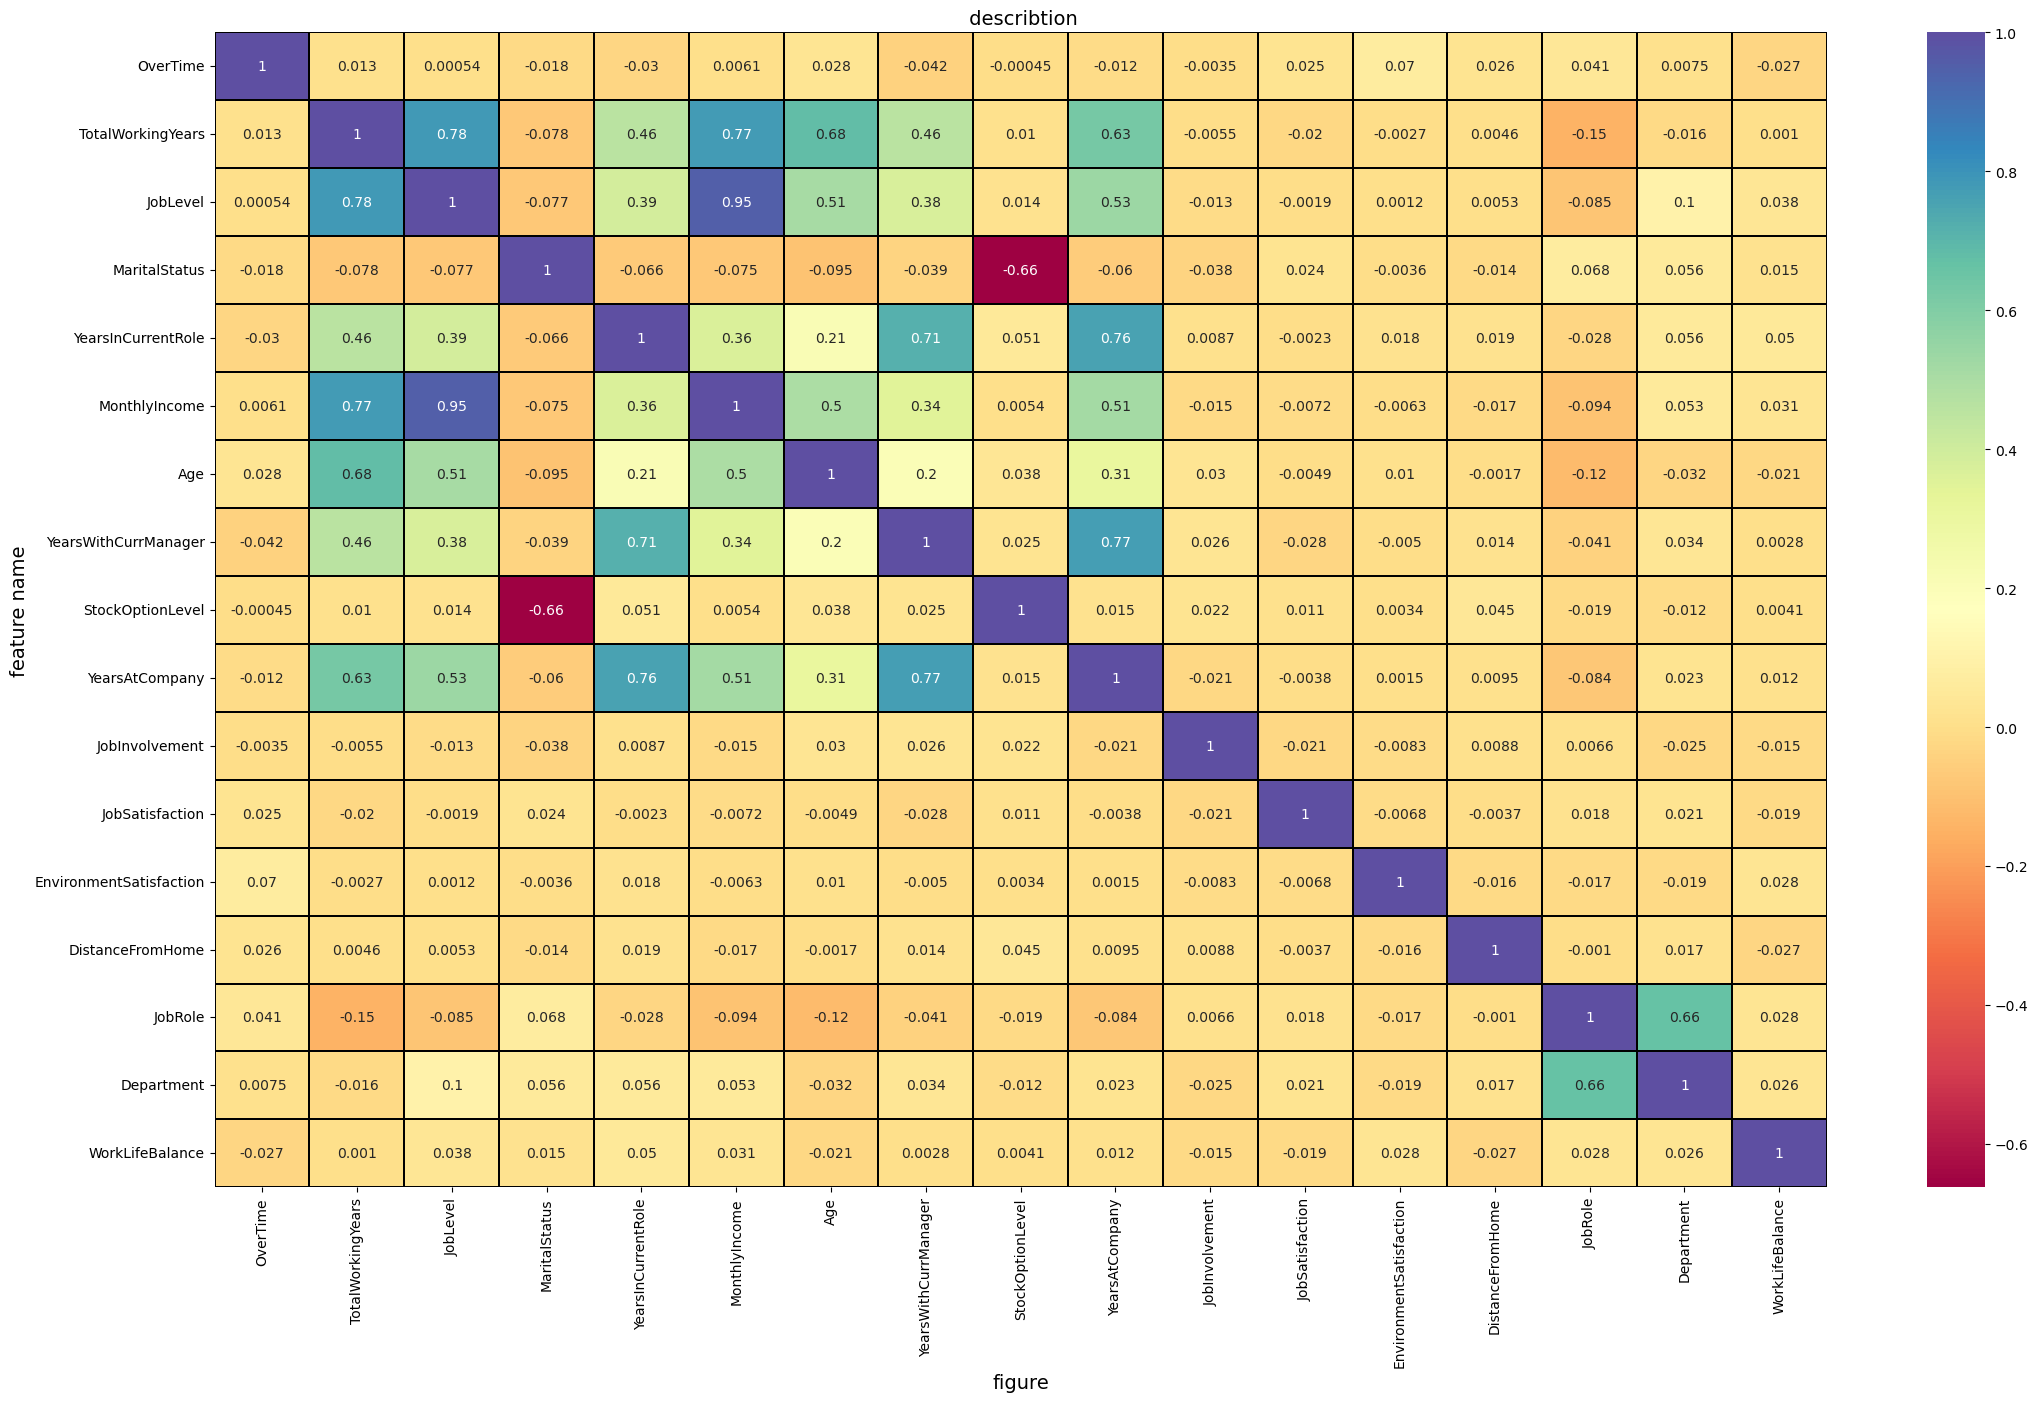

In [29]:
plt.figure(figsize = (26, 15))
sns.heatmap(new.corr(),linewidths=0.2,fmt='.2g',linecolor="black",annot=True,cmap="Spectral")
plt.xlabel('figure',fontsize=14)
plt.ylabel("feature name",fontsize=14)
plt.title(" describtion",fontsize=14)
plt.show()

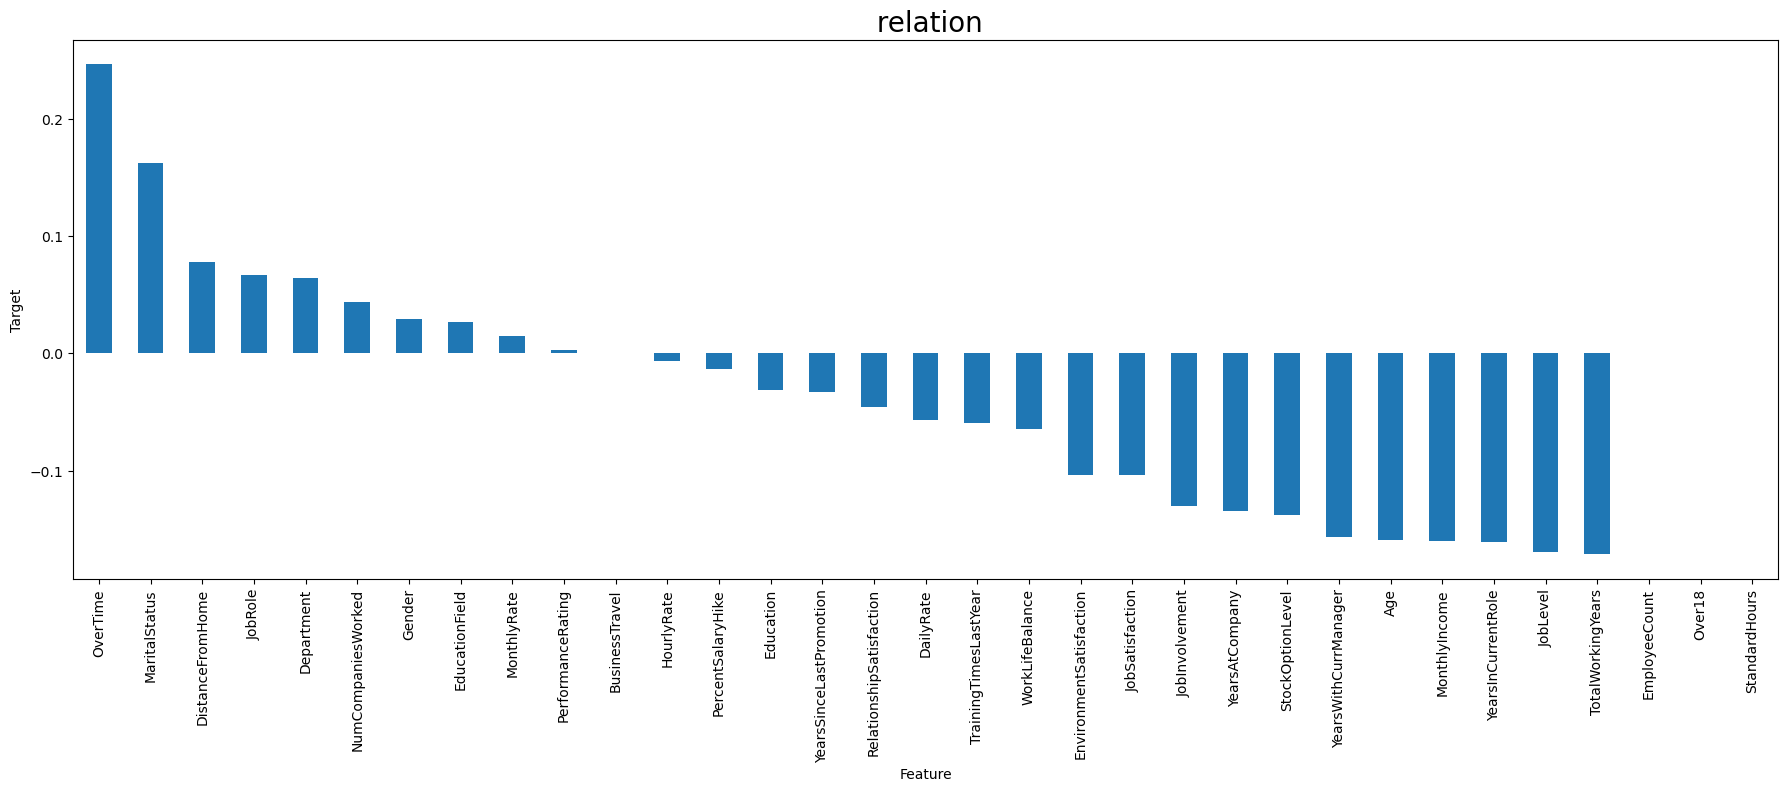

In [30]:
plt.figure(figsize=(22,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title(" relation",fontsize=20)
plt.show()

In [31]:
new.skew()

OverTime                   0.964489
TotalWorkingYears          1.117172
JobLevel                   1.025401
MaritalStatus             -0.152175
YearsInCurrentRole         0.917363
MonthlyIncome              1.369817
Age                        0.413286
YearsWithCurrManager       0.833451
StockOptionLevel           0.968980
YearsAtCompany             1.764529
JobInvolvement            -0.498419
JobSatisfaction           -0.329672
EnvironmentSatisfaction   -0.321654
DistanceFromHome           0.958118
JobRole                   -0.357270
Department                 0.172231
WorkLifeBalance           -0.552480
dtype: float64

feature scaling

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

,VIF val,Feature
0,2.054172,Age
1,1.016413,BusinessTravel
2,1.023990,DailyRate
3,1.942150,Department
4,1.017135,DistanceFromHome
5,1.063531,Education
6,1.016236,EducationField
7,0.000000,EmployeeCount
8,1.017516,EnvironmentSatisfaction
9,1.019383,Gender


In [35]:
x.drop('MonthlyIncome',axis=1,inplace=True)

In [37]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [39]:
y1.value_counts()

Attrition
1    1233
0    1233
Name: count, dtype: int64

machine learning

In [40]:
scaler=StandardScaler()
x_sca=scaler.fit_transform(new)

In [41]:
x_train,x_test,y_train, y_test = train_test_split(x_sca,y,test_size=0.25,random_state=48)

In [42]:
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,
'knn':KNeighborsClassifier(n_neighbors=3),'gb':GradientBoostingClassifier(),}     
print(model)

{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'knn': KNeighborsClassifier(n_neighbors=3), 'gb': GradientBoostingClassifier()}


In [43]:

y_preds = {}

for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)

    
    y_preds[key] = y_pred
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
value.score(x_train,y_train)

0.9328493647912885

In [45]:
value.score(x_test,y_test)

0.875

In [46]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

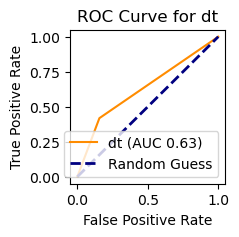


ROC AUC for dt: 0.63


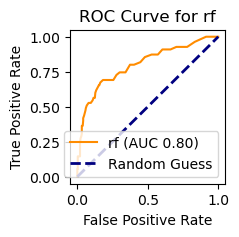


ROC AUC for rf: 0.80


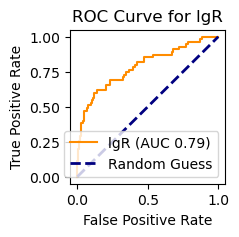


ROC AUC for lgR: 0.79


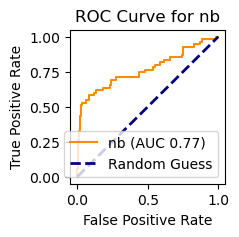


ROC AUC for nb: 0.77


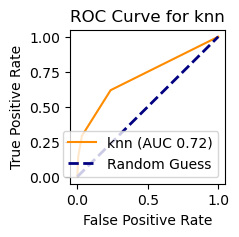


ROC AUC for knn: 0.72


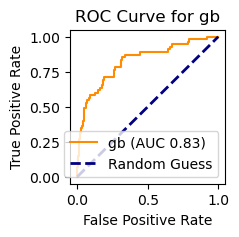


ROC AUC for gb: 0.83

R-squared: {'dt': -0.7315132152192854, 'rf': -0.06883531803659593, 'lgR': 0.01667150740633172, 'nb': -0.5391228579726981, 'knn': -0.04745861167586396, 'gb': 0.01667150740633172}

Root Mean Squared Error: {'dt': 0.4691574316284182, 'rf': 0.3686048903872428, 'lgR': 0.3535533905932738, 'nb': 0.4423258684646914, 'knn': 0.36490022459988086, 'gb': 0.3535533905932738}

Accuracy: {'dt': 0.779891304347826, 'rf': 0.8641304347826086, 'lgR': 0.875, 'nb': 0.8043478260869565, 'knn': 0.8668478260869565, 'gb': 0.875}

Best Model based on Accuracy: lgR

Best Model based on RMSE: lgR


In [47]:
y_probs = {}  
mae = {}
mse = {}
r2 = {}
rmse = {}
acu = {}

for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    acu[key] = accuracy_score(y_test, value)

    y_probs[key] = model[key].predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_probs[key][:, 1]) 
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(2,2))
    plt.plot(fpr, tpr, color='darkorange',label='{} (AUC {:.2f})'.format(key, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {key}')
    plt.legend(loc='lower right')
    plt.show()

    print(f"\nROC AUC for {key}: {roc_auc:.2f}")  
    
    
print("\nR-squared:", r2)
print("\nRoot Mean Squared Error:", rmse)
print("\nAccuracy:", acu)

best_model = max(acu, key=acu.get)
print("\nBest Model based on Accuracy:", best_model)

best_model_rmse = min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model_rmse)


In [48]:
lgR=LogisticRegression()
lgR.fit(x_train,y_train)

LogisticRegression()

In [49]:
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
cross_val_score(lgR,x_sca,y,cv=5)

array([0.86734694, 0.86054422, 0.86394558, 0.84013605, 0.86394558])

In [50]:
cross_val_score(lgR,x_sca,y,cv=5).mean()

0.8591836734693878

In [51]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

gscv = GridSearchCV(estimator=lgR, param_grid=param_grid, cv=5, scoring='accuracy')

gscv.fit(x_train, y_train)
print("Best Parameters:", gscv.best_params_)
print("Best Accuracy:", gscv.best_score_)


Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.8630028794734678


In [52]:
y_pred=lgR.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[301  12]
 [ 34  21]]


saving the best model

In [54]:
import pickle

In [55]:
filename = 'HR_best_model.pkl'
pickle.dump(lgR, open(filename, 'wb'))